In [4]:

!pip install numpy

In [5]:
!pip install keras tensorflow


In [6]:
!pip install matplotlib

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt



In [8]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

Normalize 

In [9]:
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0


to_categorical

In [10]:
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)

before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


Architecture

In [11]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compile
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.0995 - loss: 2.6665 - val_accuracy: 0.1015 - val_loss: 2.3027
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0990 - loss: 2.3034 - val_accuracy: 0.1023 - val_loss: 2.3028
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0984 - loss: 2.3035 - val_accuracy: 0.0953 - val_loss: 2.3048
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0998 - loss: 2.3036 - val_accuracy: 0.0953 - val_loss: 2.3040
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0993 - loss: 2.3035 - val_accuracy: 0.0979 - val_loss: 2.3042
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1014 - loss: 2.3035 - val_accuracy: 0.1016 - val_loss: 2.3030
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0996 - loss: 2.3037 - val_accuracy: 0.0978 - val_loss: 2.3034
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0987 - loss: 2.3036 - val_accuracy

In [14]:
#Evaluate
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")
print(result.history.keys())
print(result.history.values())
print(result.history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1000 - loss: 2.3039
test loss:2.303887128829956
test accuracy:0.10000000149011612
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
dict_values([[0.09952499717473984, 0.09897500276565552, 0.09844999760389328, 0.09977500140666962, 0.09929999709129333, 0.10142499953508377, 0.09955000132322311, 0.09867499768733978, 0.0997999981045723, 0.10117500275373459], [2.666501522064209, 2.30344820022583, 2.303469657897949, 2.3035969734191895, 2.303506851196289, 2.303527355194092, 2.303732395172119, 2.303560256958008, 2.3037490844726562, 2.303400754928589], [0.1014999970793724, 0.1023000031709671, 0.09529999643564224, 0.09529999643564224, 0.09790000319480896, 0.10159999877214432, 0.09780000150203705, 0.10040000081062317, 0.10159999877214432, 0.09799999743700027], [2.3027138710021973, 2.302799940109253, 2.304816722869873, 2.3040409088134766, 2.304159164428711, 2.3030412197113037, 2.3034133911132812, 2.30419921875, 2.3031787872314453, 2.3

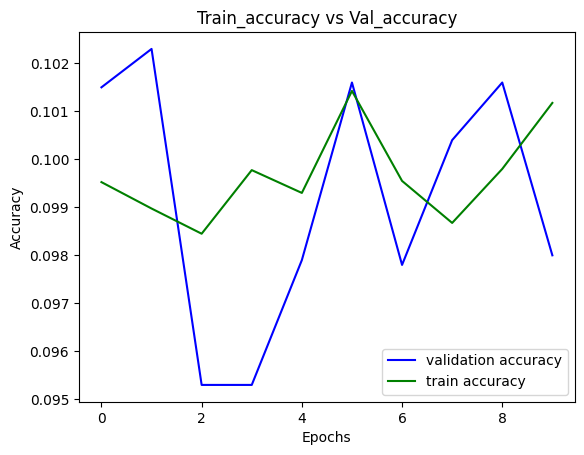

In [15]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

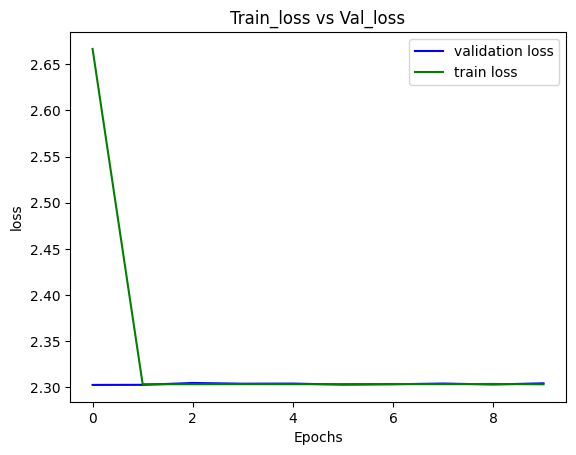

In [16]:
plt.plot(result.history['val_loss'],label="validation loss",color="blue")
plt.plot(result.history['loss'],label="train loss",color="green")
plt.title("Train_loss vs Val_loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

Experiment with depth(number of hidden layers)

In [17]:
#import libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
from keras.optimizers import Adam
from keras.utils import to_categorical
import matplotlib.pyplot as plt

#Load the Data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.dtype)
print(x_train.shape)
print(y_test.shape)
print(x_train[0])

#plt.imshow(x_train[0])
#plt.show()
print("***************************")
#print(f"label is :{y_train[0]}")

#normalize
x_train = x_train.astype('float32')/255.0
x_test  = x_test.astype('float32')/255.0

#to_categorical
print(f"before : label is :{y_train[0]}")
y_train = to_categorical(y_train)
print(f"after : label is :{y_train[0]}")
print(f"after : label is :{y_train[100]}")
y_test = to_categorical(y_test)



uint8
(50000, 32, 32, 3)
(10000, 1)
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
***************************
before : label is :[6]
after : label is :[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
after : label is :[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [18]:
model = Sequential()
model.add(Flatten(input_shape =(32,32,3)))
model.add(Dense(128,'relu'))  #layer containg 128 neuron 
model.add(Dense(10,'softmax'))       #10 neurons last layer
model.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
#Train
result=model.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.1758 - loss: 2.3609 - val_accuracy: 0.1862 - val_loss: 2.0786
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.1801 - loss: 2.0779 - val_accuracy: 0.1797 - val_loss: 2.0613
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1828 - loss: 2.0642 - val_accuracy: 0.1720 - val_loss: 2.0941
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1832 - loss: 2.0602 - val_accuracy: 0.1788 - val_loss: 2.0570
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1827 - loss: 2.0634 - val_accuracy: 0.1857 - val_loss: 2.1552
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1808 - loss: 2.0635 - val_accuracy: 0.1455 - val_loss: 2.1425
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1834 - loss: 2.0583 - val_accuracy: 0.1730 - val_loss: 2.0691
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.1827 - loss: 2.0569 - val_accuracy:

In [20]:
loss,accuracy = model.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1869 - loss: 2.0735
test loss:2.073458433151245
test accuracy:0.18690000474452972


In [21]:
model_3 = Sequential()
model_3.add(Flatten(input_shape =(32,32,3)))
model_3.add(Dense(128,'relu'))  #layer containg 128 neuron 
model_3.add(Dense(128,'relu'))
model_3.add(Dense(128,'relu'))
model_3.add(Dense(10,'softmax'))       #10 neurons last layer
model_3.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_3.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.2419 - loss: 2.0993 - val_accuracy: 0.2896 - val_loss: 1.9294
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.2909 - loss: 1.9144 - val_accuracy: 0.3037 - val_loss: 1.8949
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.2935 - loss: 1.9000 - val_accuracy: 0.3120 - val_loss: 1.8882
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.3031 - loss: 1.8873 - val_accuracy: 0.2989 - val_loss: 1.9267
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3087 - loss: 1.8741 - val_accuracy: 0.3135 - val_loss: 1.8829
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.3101 - loss: 1.8717 - val_accuracy: 0.3014 - val_loss: 1.8971
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.3102 - loss: 1.8613 - val_accuracy: 0.3301 - val_loss: 1.8405
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3194 - loss: 1.8548 - val_a

In [22]:
#Evaluate
loss,accuracy = model_3.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3107 - loss: 1.8789
test loss:1.8789135217666626
test accuracy:0.310699999332428


In [23]:
model_5 = Sequential()
model_5.add(Flatten(input_shape =(32,32,3)))
model_5.add(Dense(1024,'relu'))  #layer containg 128 neuron 
model_5.add(Dense(512,'relu'))
model_5.add(Dense(256,'relu'))
model_5.add(Dense(128,'relu'))
model_5.add(Dense(64,'relu'))
model_5.add(Dense(10,'softmax'))       #10 neurons last layer
model_5.compile(optimizer=Adam(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
#Train
result=model_5.fit(x_train,y_train,epochs=10,batch_size=64,validation_split=0.2) #64 images are sent each time

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 69ms/step - accuracy: 0.1981 - loss: 2.4372 - val_accuracy: 0.2303 - val_loss: 2.0835
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.2244 - loss: 2.0343 - val_accuracy: 0.2181 - val_loss: 2.0541
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.2453 - loss: 1.9884 - val_accuracy: 0.2630 - val_loss: 1.9652
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 95ms/step - accuracy: 0.2598 - loss: 1.9445 - val_accuracy: 0.2673 - val_loss: 1.9462
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 71ms/step - accuracy: 0.2645 - loss: 1.9357 - val_accuracy: 0.2702 - val_loss: 1.9234
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.2734 - loss: 1.9126 - val_accuracy: 0.2718 - val_loss: 1.9339
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.2792 - loss: 1.8998 - val_accuracy: 0.2904 - val_loss: 1.8939
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.2935 - loss: 1.8790 - 

In [24]:
#Evaluate
loss,accuracy = model_5.evaluate(x_test,y_test)
print(f"test loss:{loss}")
print(f"test accuracy:{accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3018 - loss: 1.8604
test loss:1.8603761196136475
test accuracy:0.301800012588501


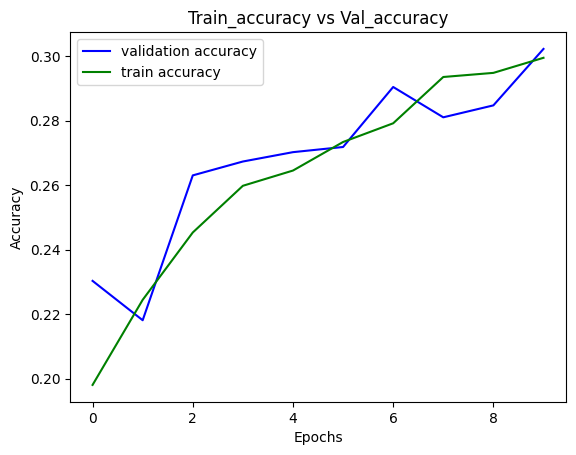

In [25]:
#visualization
plt.plot(result.history['val_accuracy'],label="validation accuracy",color="blue")
plt.plot(result.history['accuracy'],label="train accuracy",color="green")
plt.title("Train_accuracy vs Val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [26]:
#SGD
#adam
#rmsprop